# <center><b>Customer Churn Prediction </b>

*This case study is an implementation of various machine learning tools and techniques to predict customer churn for a telecom company. This blogpost is for anyone wishes to learn how to use python to do customer churn analysis.*

### Contents
- Introduction
- Project Overview
- Data Exploration
- Data Preprocessing
- Feature Engineering
- Model Building
- Model Evaluation
- Results and Insights
- Conclusion

### Introduction
Customer churn, the phenomenon where customers stop doing business with a company, is a critical concern for many industries. Predicting which customers are likely to churn can help businesses take proactive measures to retain them.

### 🎯 Goal 
- This project demonstrates how to build a machine learning model to predict customer churn using a telecommunications company dataset.

### <center>Project Overview

### 📍 Objective
To develop a predictive model that can identify customers at risk of churning, allowing the company to take targeted retention actions.

### 📄 Dataset
The dataset used is from a telecommunications company, containing various customer attributes and their churn status.

### ⚙️ Tools and Libraries
Python
Pandas for data manipulation
Matplotlib and Seaborn for data visualization
Scikit-learn for machine learning models

===========================================================================================================

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings ("ignore")

### 1. Data Exploration

In [2]:
churn_df= pd.read_csv(r"C:\Users\Dell\Desktop\My work\Finall projects\project1 Costumer Churn Predection\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

This dataset contains the following columns:

- `customerID:` Unique customer identifier
- `gender:` Customer's gender (Male/Female)
- `SeniorCitizen:` Whether the customer is a senior citizen (1 for Yes, 0 for No)
- `Partner:` Whether the customer has a partner (Yes/No)
- `Dependents:` Whether the customer has dependents (Yes/No)
- `tenure:` Number of months the customer has stayed with the company
- `PhoneService:` Whether the customer has phone service (Yes/No)
- `MultipleLines:` Whether the customer has multiple lines (Yes/No/No phone service)
- `InternetService:` Type of internet service (DSL, Fiber optic, No)
- `OnlineSecurity:` Whether the customer has online security (Yes/No/No internet service)
- `OnlineBackup:` Whether the customer has online backup (Yes/No/No internet service)
- `DeviceProtection:` Whether the customer has device protection (Yes/No/No internet service)
- `TechSupport:` Whether the customer has tech support (Yes/No/No internet service)
- `StreamingTV:` Whether the customer has streaming TV (Yes/No/No internet service)
- `StreamingMovies:` Whether the customer has streaming movies (Yes/No/No internet service)
- `Contract:` Contract type (Month-to-month, One year, Two year)
- `PaperlessBilling:` Whether the customer uses paperless billing (Yes/No)
- `PaymentMethod:` Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges:` The amount charged to the customer monthly
- `TotalCharges:` The total amount charged to the customer
- `Churn:` Whether the customer churned (Yes/No)

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*In the above dataset the `TotalCharges` is object but we need to get it in floating value* 

In [5]:
churn_df["TotalCharges"]=pd.to_numeric(churn_df["TotalCharges"] , errors="coerce")

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*lets take a look at number columns*

In [7]:
churn_df.select_dtypes(include=['number'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [8]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [9]:
# lets check for missing values 

churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*we can see there are some of the missing value in `TotalCharges`*

We need to know the reason why the data are missing. So, we need to have a look at the missing values.

See, if Total Charges is missing, one of the reason may be because, the tenure is '0'. Because:

- **Total Charges = Tenure * Monthly Charges**

##### Hence, let's look at the tenure value of the missing Total Charges.

In [10]:
missing_rows = churn_df[churn_df["TotalCharges"].isna()]
missing_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
missing_rows["tenure"]

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

### 2. Handling missing values

Now, we know the tenure is '0' and that is why the total charges is missing. 

We can fix this by assigning '0.0' as a value to all the missing ones.

In [12]:
churn_df.loc[(churn_df["TotalCharges"].isna()) & (churn_df["tenure"]==0) , "TotalCharges"] = 0.0


- `Logic:`

 When a customer has a tenure of 0 (i.e., they just signed up or haven't completed a month), it makes sense that their TotalCharges would be 0. However, in some datasets, the "TotalCharges" might have been recorded as NaN for these cases. This code replaces those NaN values with 0.0 to reflect that these customers haven't been charged yet.


In [13]:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Encoding Target Variable

In [14]:
churn_df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [15]:
churn_df["Churn"]= churn_df["Churn"].map ({"No" : 0 , 
                                         "Yes" : 1})

### 3.EDA <u> (Exploratory Data Analysis)</u>

In [16]:
category_cols= churn_df.select_dtypes("object")
category_cols.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [17]:
category_cols.drop(columns="customerID",axis=0,inplace=True)
for i,var in enumerate(category_cols):
    print(churn_df[var].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
numerical_cols=churn_df.select_dtypes('number')
numerical_cols.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [19]:
numerical_cols.drop(columns=["SeniorCitizen" , "Churn"],axis=0 , inplace=True)
numerical_cols.columns 

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Distribution of Numerical Columns

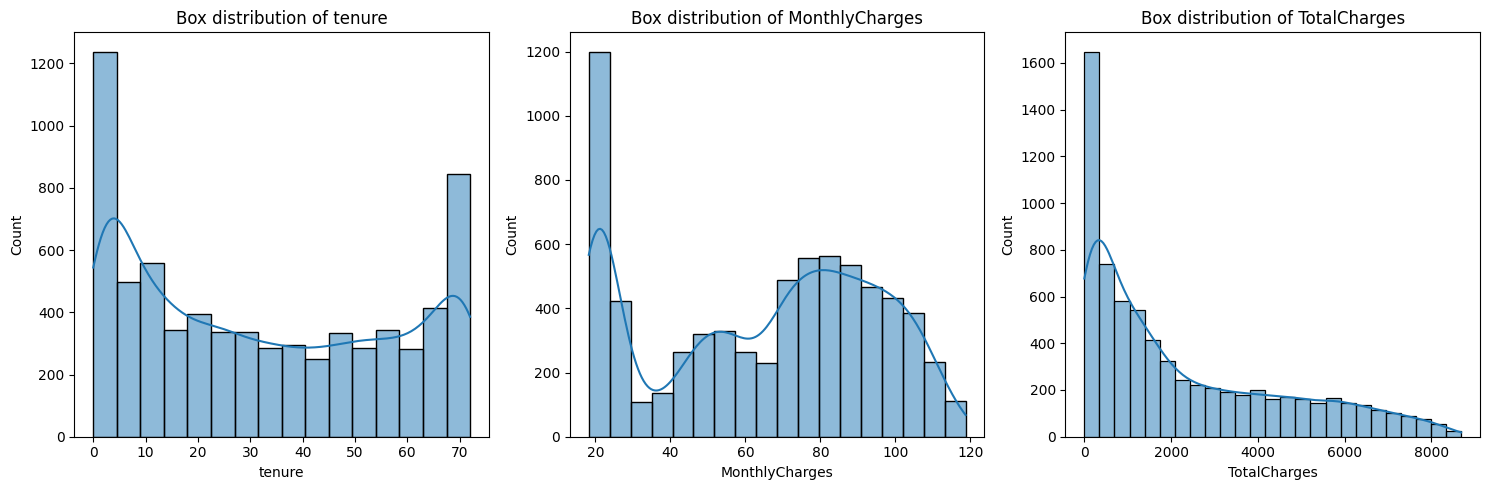

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the numerical variables and their corresponding palettes
for i, var in enumerate(numerical_cols):
    sns.histplot(data=churn_df[var], kde=True ,palette="PuBu", ax=axes[i])
    axes[i].set_title(f"Box distribution of {var}")

plt.tight_layout()
plt.show()

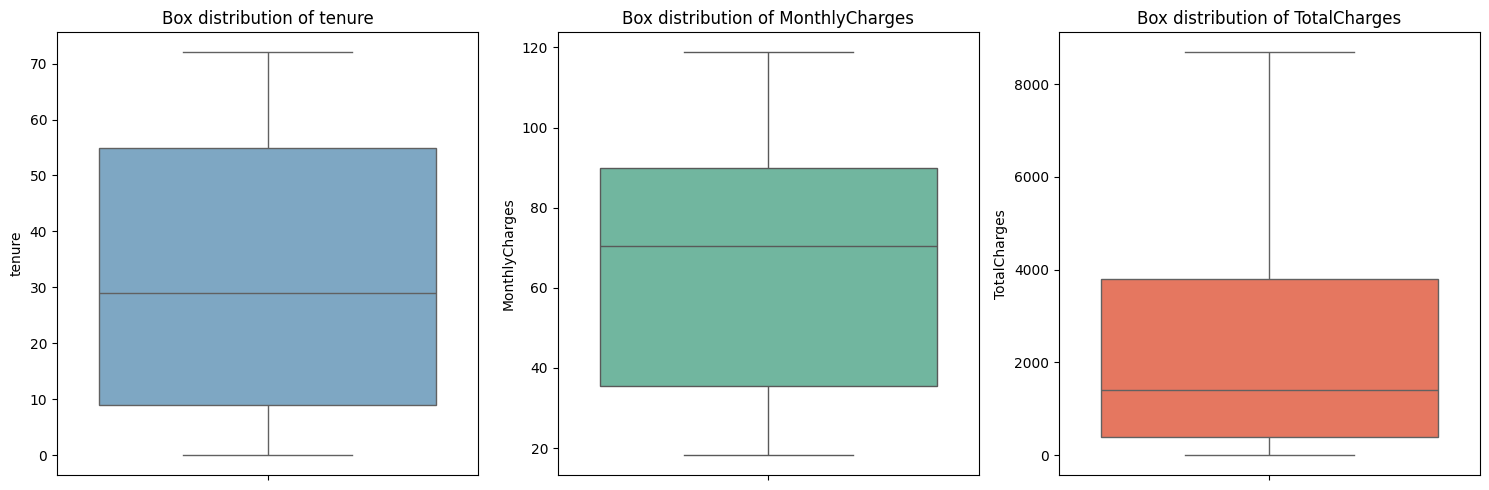

In [21]:
# Define the color palettes for each subplot
palettes = ["PuBu", "BuGn", "Reds"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the numerical variables and their corresponding palettes
for i, (var, palette) in enumerate(zip(numerical_cols, palettes)):
    sns.boxplot(data=churn_df, y=var, palette=palette, ax=axes[i])
    axes[i].set_title(f"Box distribution of {var}")

plt.tight_layout()
plt.show()

In [22]:
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].map({1:"Yes" ,
                                                           0:"No" })

category_cols=pd.concat([category_cols, churn_df["SeniorCitizen"]],axis=1)
category_cols.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'],
      dtype='object')

### Categorical Variable Analysis

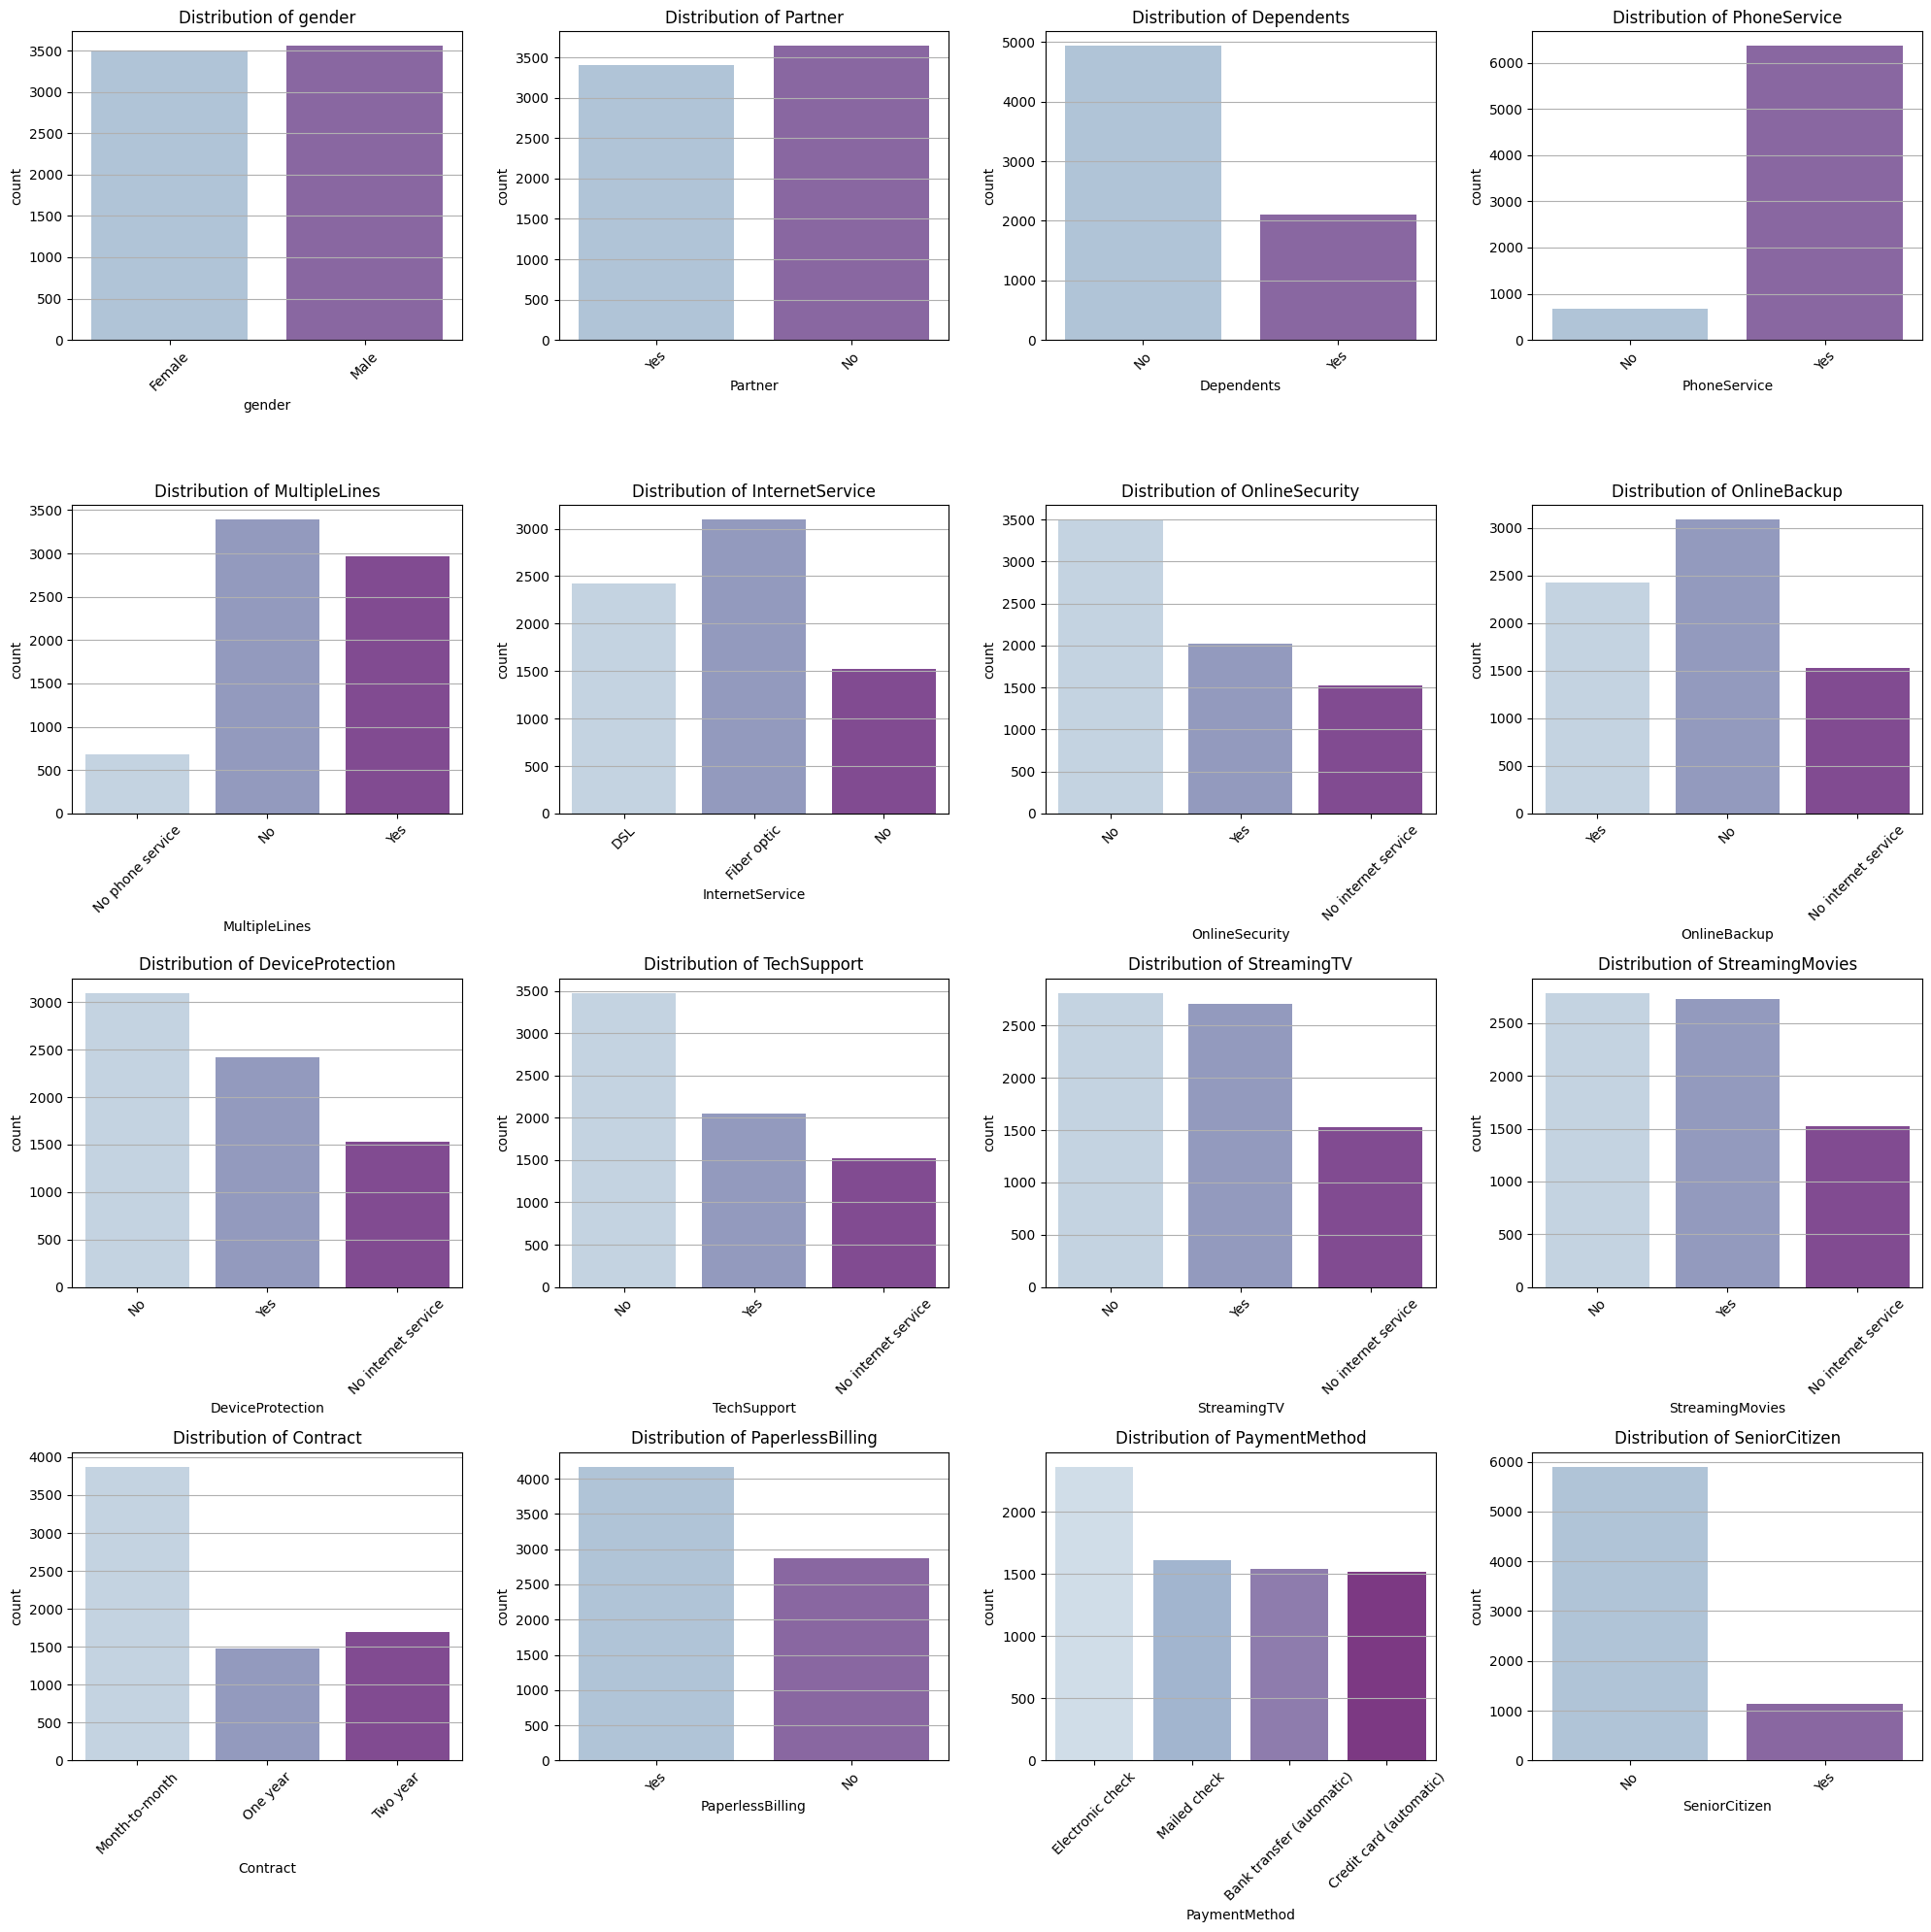

In [23]:
# Assuming `categorical_vars` is a list of categorical variables and `data` is your DataFrame
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Create a 4x4 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Plot count plots
for i, var in enumerate(category_cols):
    sns.countplot(x=var, data=churn_df, ax=axes[i], palette='BuPu')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis="y")

# Hide any unused subplots if there are fewer variables than subplots
for i in range(len(category_cols), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Bi-Variate Analysis

`Numerical Data Vs Target Variable`

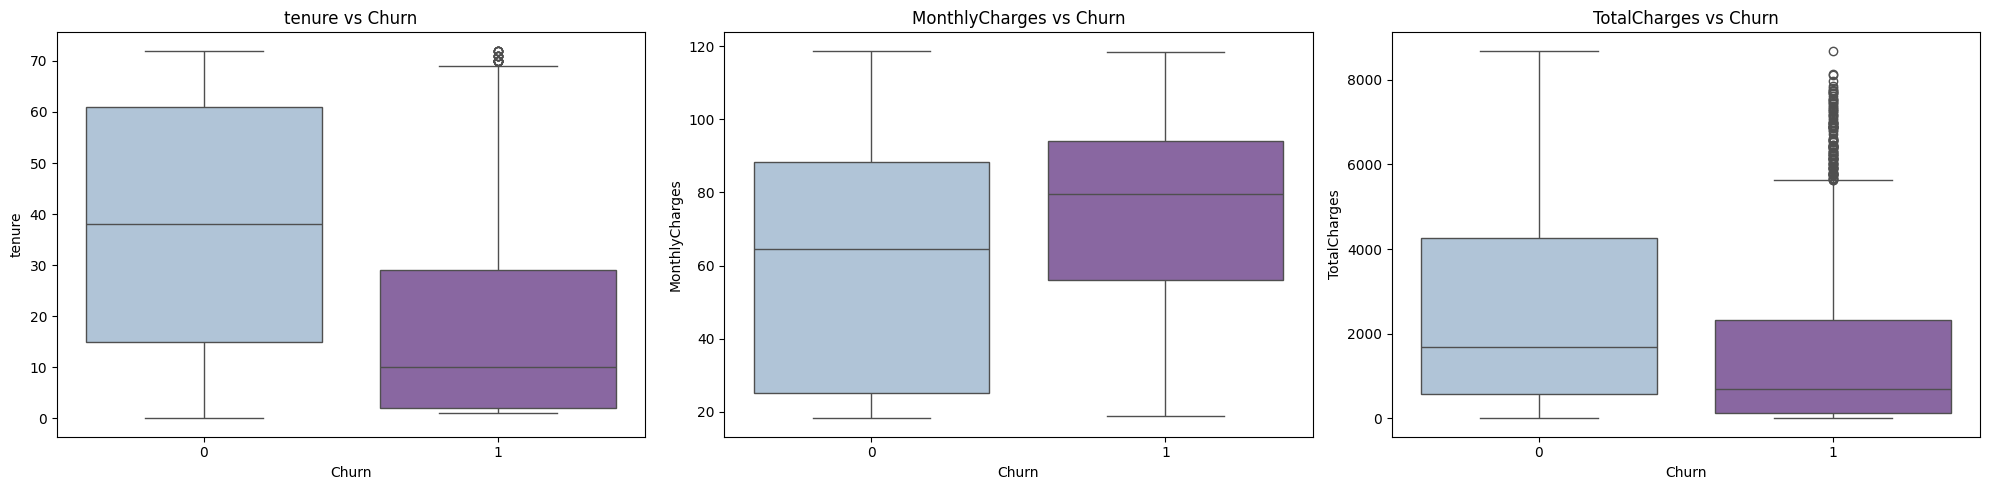

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, var in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=var, data=churn_df,palette="BuPu", ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    
plt.tight_layout()
plt.show()

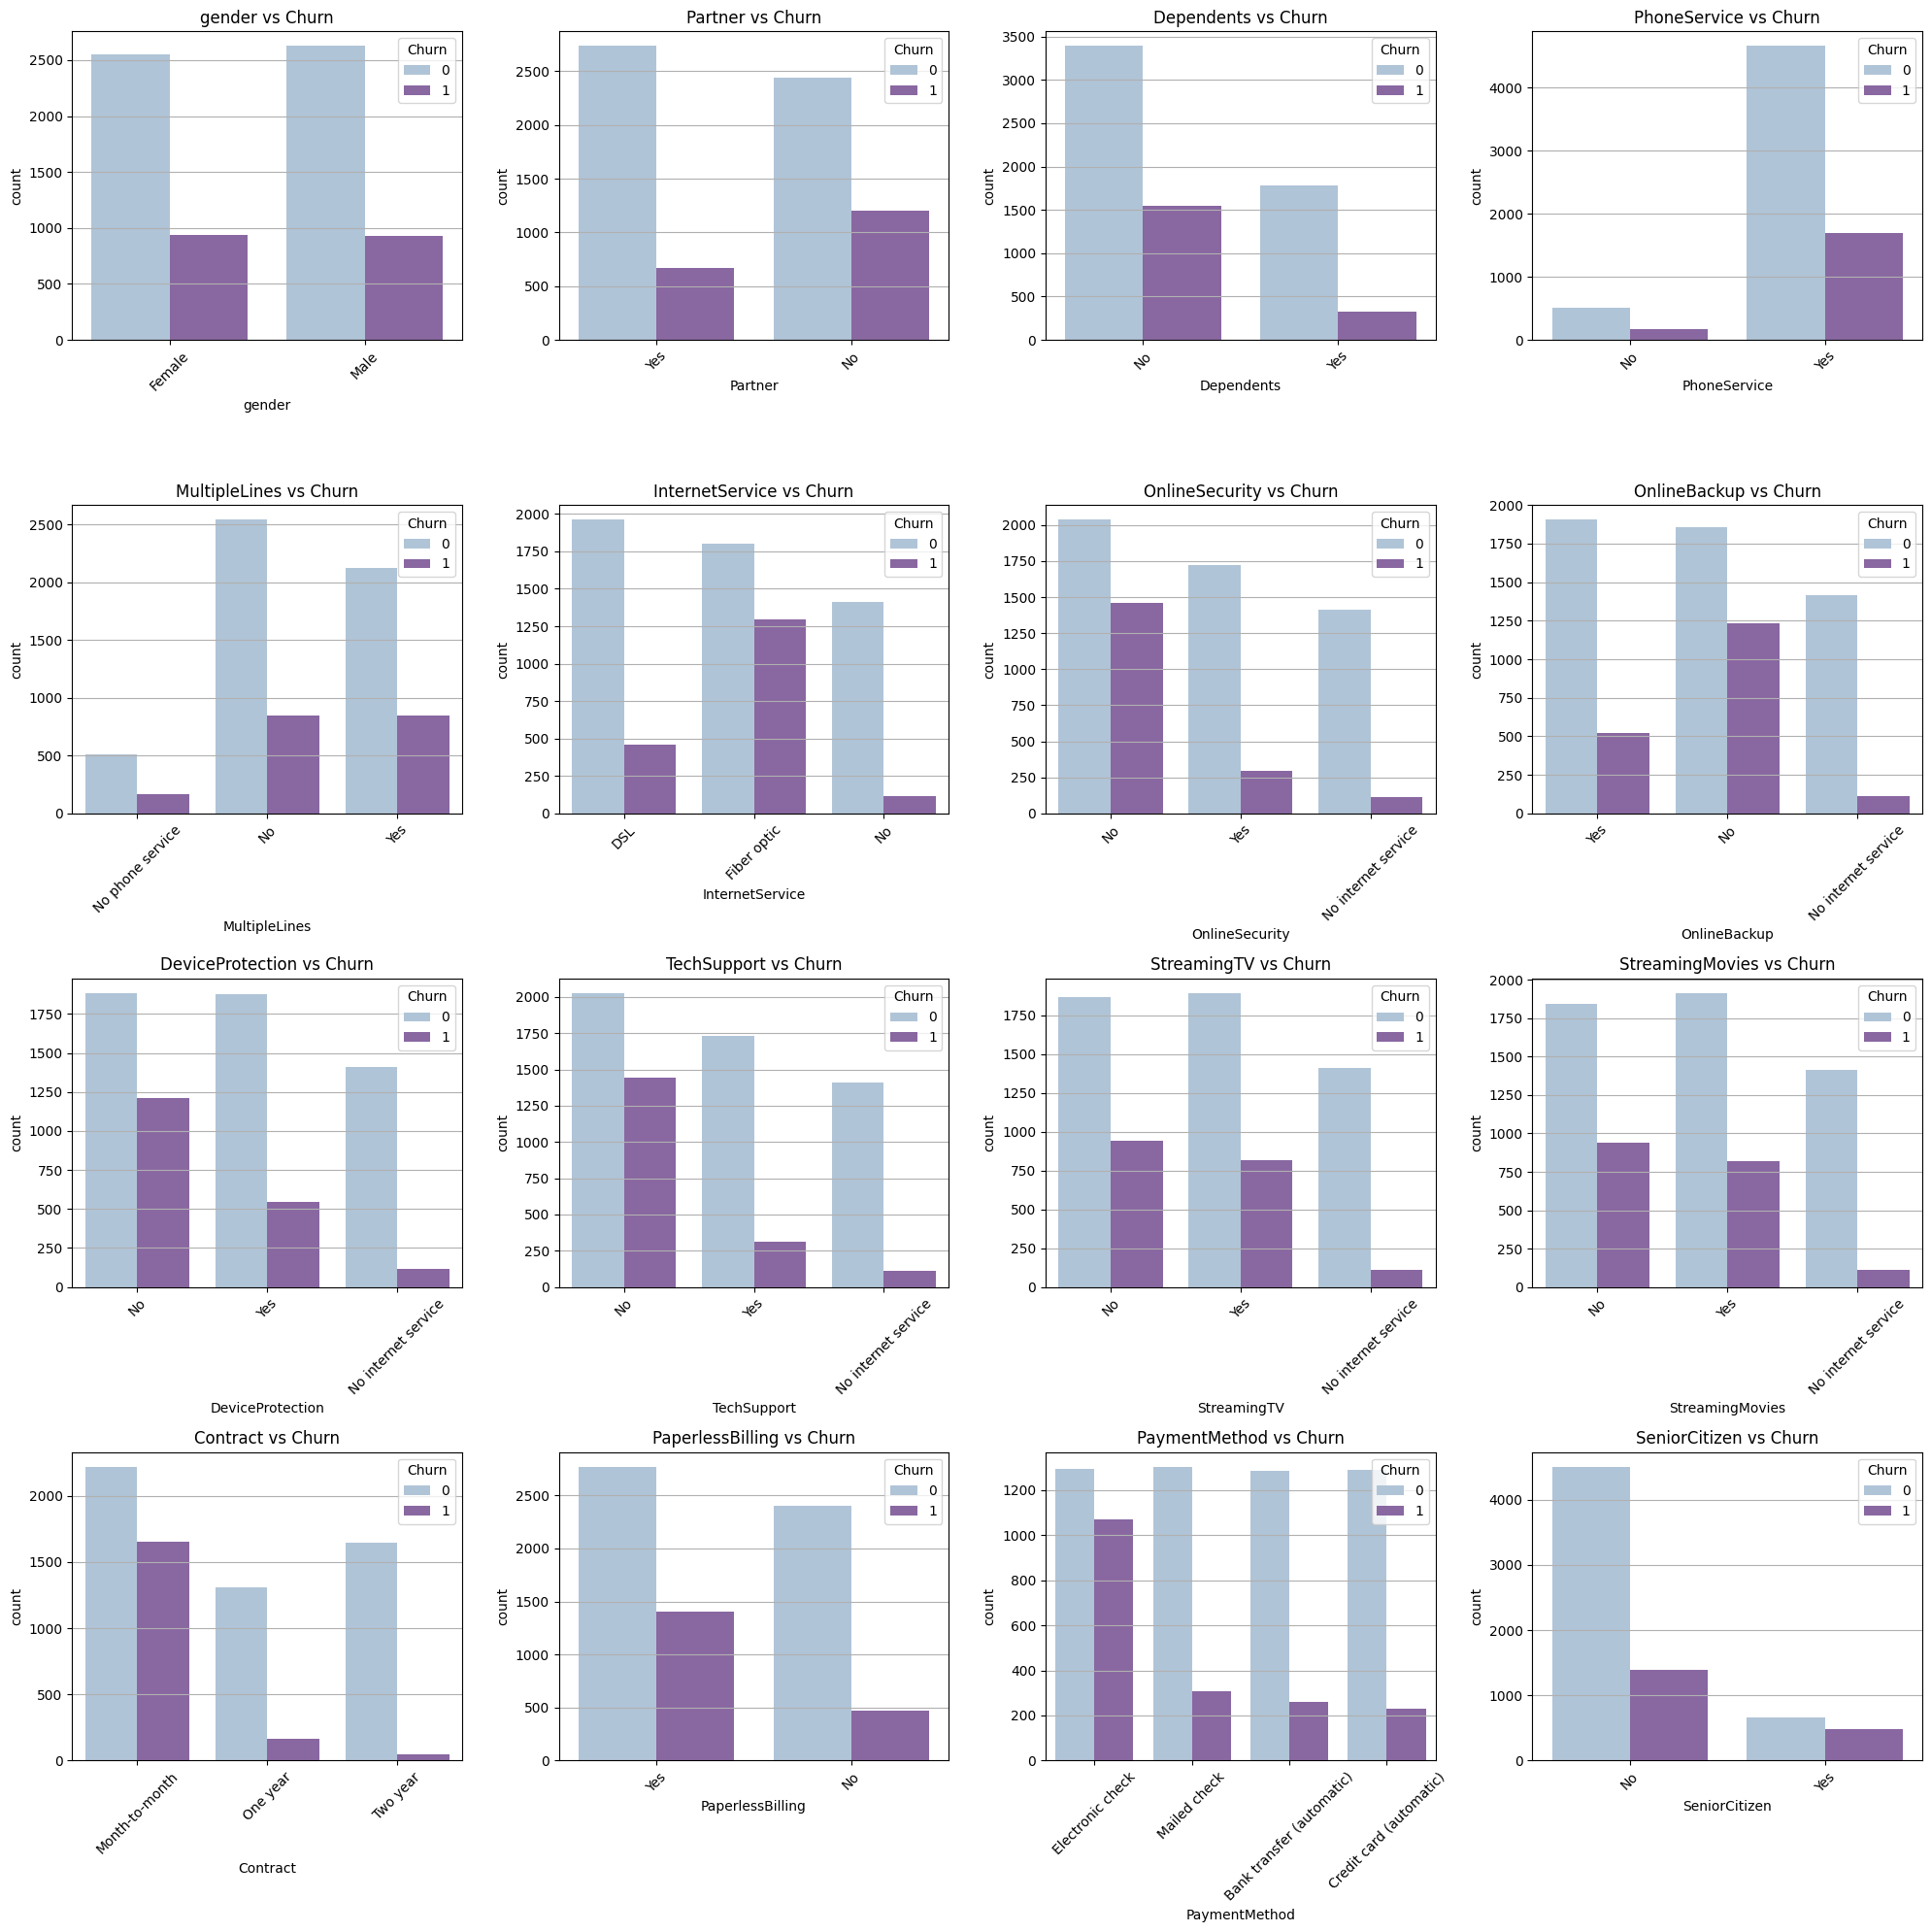

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))


axes = axes.flatten()

for i, var in enumerate(category_cols):
    sns.countplot(x=var, hue='Churn', data=churn_df,palette="BuPu", ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

### Corelation

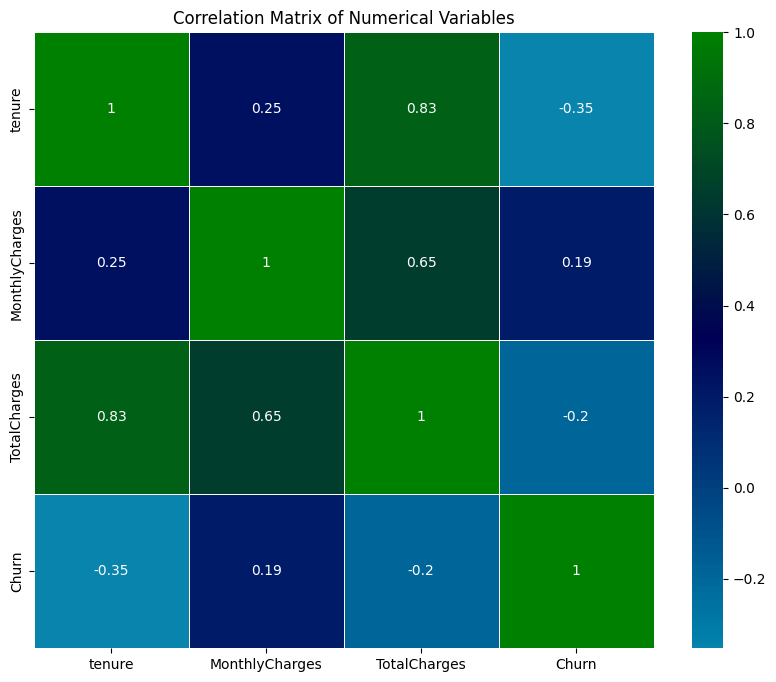

In [26]:
# Ensure 'numerical_cols' and 'Churn' are valid
numerical_cols = [col for col in numerical_cols if col in churn_df.columns]

# Calculate the correlation matrix including 'Churn'
corr_matrix = churn_df[numerical_cols + ['Churn']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='ocean_r', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [27]:
#Feature Engineering for EDA
churn_df['CLV'] = churn_df['tenure'] * churn_df['MonthlyCharges']
churn_df["CLV"]

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: CLV, Length: 7043, dtype: float64

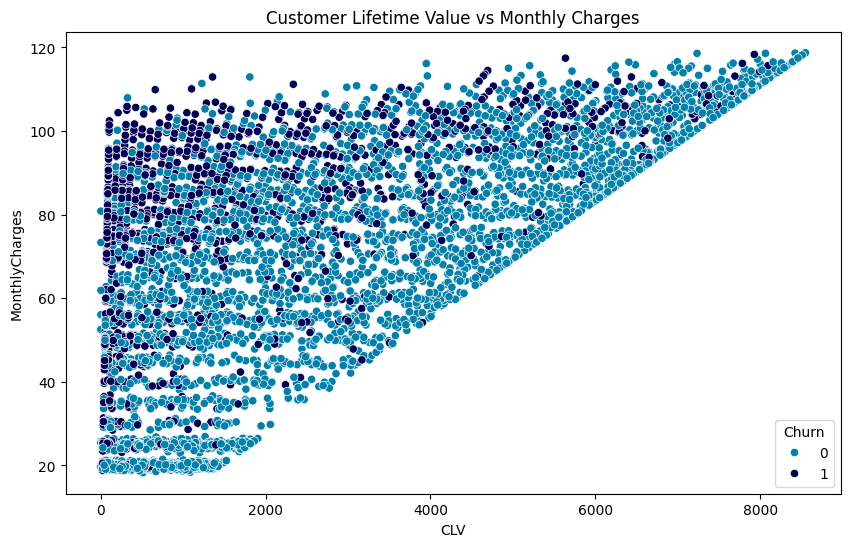

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV', y='MonthlyCharges', hue='Churn', data=churn_df,palette="ocean_r")
plt.title('Customer Lifetime Value vs Monthly Charges')
plt.show()

In [29]:
churn_df['TenureBin'] = pd.cut(churn_df['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years'])


In [30]:
churn_by_contract_tenure = churn_df.groupby(['Contract', 'TenureBin'])['Churn'].mean().unstack()
churn_by_contract_tenure

TenureBin,0-1 Year,1-2 Years,2-3 Years,3-4 Years,4-5 Years,5+ Years
Contract,,,,,,
Month-to-month,0.513541,0.377205,0.325103,0.335443,0.277778,0.222222
One year,0.105691,0.081218,0.080000,0.130597,0.137072,0.121406
Two year,0.000000,0.000000,0.020833,0.022472,0.039711,0.031440


In [31]:
# Reset the index to get 'Contract' as a column
churn_by_contract_tenure = churn_by_contract_tenure.reset_index()

# Convert the data into long format (melt) for seaborn
churn_melted = churn_by_contract_tenure.melt(id_vars='Contract', var_name='TenureBin', value_name='ChurnRate')
churn_melted


,Contract,TenureBin,ChurnRate
0,Month-to-month,0-1 Year,0.513541
1,One year,0-1 Year,0.105691
2,Two year,0-1 Year,0.000000
3,Month-to-month,1-2 Years,0.377205
4,One year,1-2 Years,0.081218
5,Two year,1-2 Years,0.000000
6,Month-to-month,2-3 Years,0.325103
7,One year,2-3 Years,0.080000
8,Two year,2-3 Years,0.020833
9,Month-to-month,3-4 Years,0.335443


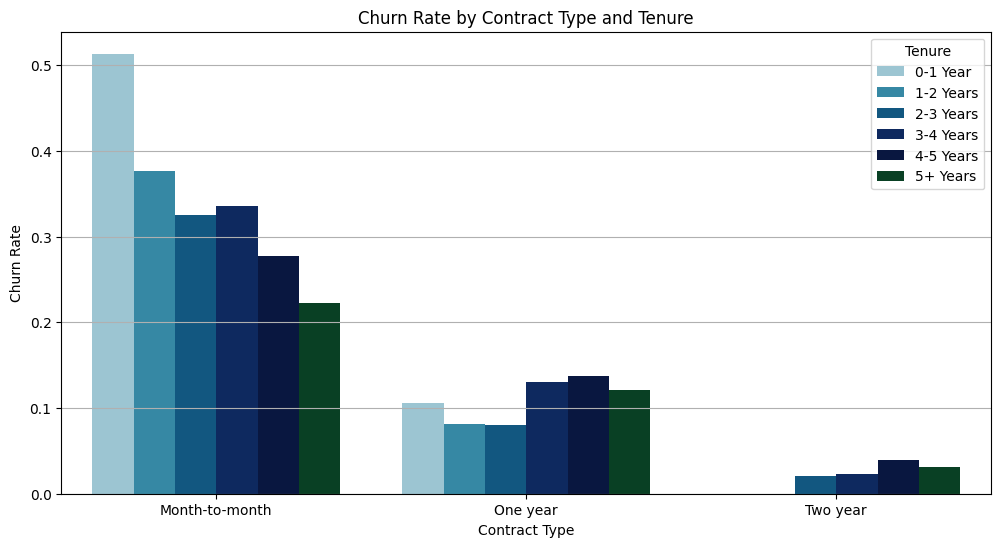

In [32]:
# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Contract', y='ChurnRate', hue='TenureBin', data=churn_melted,palette="ocean_r")

# Customizing the plot
plt.title('Churn Rate by Contract Type and Tenure')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='Tenure')
plt.grid(axis='y')
plt.show()

### Independent Variable and Dependent Variable

In [33]:
churn_df.drop(columns="customerID",axis=1,inplace=True)

In [34]:
churn_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CLV,TenureBin
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.85,0-1 Year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,1936.30,2-3 Years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,107.70,0-1 Year


In [35]:
X= churn_df.drop("Churn",axis=1)
X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLV,TenureBin
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.85,0-1 Year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,1936.30,2-3 Years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,107.70,0-1 Year


In [36]:
y = churn_df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Feature Processing
For feature preprocessing using ColumnTransformer and Pipeline in scikit-learn, you can handle numeric and categorical features as described. Here's how to structure the preprocessing pipeline:

Steps:

`Numeric features:` Impute missing values (e.g., with the mean) and scale the features using StandardScaler.

`Categorical features:` Impute missing values (e.g., with the most frequent value) and encode the features using OneHotEncoder.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Train and Test split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'CLV', 'TenureBin'],
      dtype='object')

In [40]:
x_test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'CLV', 'TenureBin'],
      dtype='object')

In [41]:
# Define Transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

category_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers & creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['tenure', 'MonthlyCharges', 'TotalCharges']),
        ('cat', category_transformer, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'])
    ]
)



In [42]:
# Fit and transform data
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)


In [43]:
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out()
feature_names = numerical_cols + list(cat_feature_names)

print(feature_names)

['tenure', 'MonthlyCharges', 'TotalCharges', 'x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No', 'x3_Yes', 'x4_No', 'x4_No phone service', 'x4_Yes', 'x5_DSL', 'x5_Fiber optic', 'x5_No', 'x6_No', 'x6_No internet service', 'x6_Yes', 'x7_No', 'x7_No internet service', 'x7_Yes', 'x8_No', 'x8_No internet service', 'x8_Yes', 'x9_No', 'x9_No internet service', 'x9_Yes', 'x10_No', 'x10_No internet service', 'x10_Yes', 'x11_No', 'x11_No internet service', 'x11_Yes', 'x12_Month-to-month', 'x12_One year', 'x12_Two year', 'x13_No', 'x13_Yes', 'x14_Bank transfer (automatic)', 'x14_Credit card (automatic)', 'x14_Electronic check', 'x14_Mailed check', 'x15_No', 'x15_Yes']


In [44]:
# Convert preprocessed data to DataFrame
x_train_preprocessed = pd.DataFrame(x_train_preprocessed, columns=feature_names)
x_test_preprocessed = pd.DataFrame(x_test_preprocessed, columns=feature_names)

x_train_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,...,x12_One year,x12_Two year,x13_No,x13_Yes,x14_Bank transfer (automatic),x14_Credit card (automatic),x14_Electronic check,x14_Mailed check,x15_No,x15_Yes
0,1.612532,0.674154,1.704761,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.747907,-0.614894,-0.709771,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.571835,-1.335097,-0.208672,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.025340,0.301578,0.053140,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.595101,1.128231,0.990579,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
x_test_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,...,x12_One year,x12_Two year,x13_No,x13_Yes,x14_Bank transfer (automatic),x14_Credit card (automatic),x14_Electronic check,x14_Mailed check,x15_No,x15_Yes
0,-0.544421,-0.220695,-0.545703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.124165,1.722025,2.098514,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.788605,0.236709,-0.599167,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.276971,-1.476477,-0.997016,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.920679,0.429651,0.872862,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
x_train_preprocessed.shape

(5634, 46)

In [47]:
x_test_preprocessed.shape

(1409, 46)

### Feature Engineering

We created two new features:

- ### Customer Lifetime Value (CLV):
    
    `CLV = tenure * MonthlyCharges`

- ### Average Monthly Charges:
    `AvgMonthlyCharges = TotalCharges / tenure`

These new features were then scaled using StandardScaler.

In [48]:
def features_engineer(churn_df):
    
    churn_df['CLV'] = churn_df['tenure'] * churn_df['MonthlyCharges']
    
    churn_df['AvgMonthlyCharges'] = churn_df['TotalCharges'] / churn_df['tenure']
    churn_df['AvgMonthlyCharges'].fillna(churn_df['MonthlyCharges'], inplace = True)
    
    return churn_df

In [49]:
x_train = features_engineer(x_train_preprocessed)
x_test = features_engineer(x_test_preprocessed)

In [50]:
#Scaling new numerical features
new_numeric_features = ['CLV','AvgMonthlyCharges']
scaler = StandardScaler()

In [51]:
x_train[new_numeric_features] = scaler.fit_transform(x_train[new_numeric_features])
x_test[new_numeric_features] = scaler.transform(x_test[new_numeric_features])

In [52]:
x_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'x0_Female', 'x0_Male',
       'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No', 'x3_Yes', 'x4_No',
       'x4_No phone service', 'x4_Yes', 'x5_DSL', 'x5_Fiber optic', 'x5_No',
       'x6_No', 'x6_No internet service', 'x6_Yes', 'x7_No',
       'x7_No internet service', 'x7_Yes', 'x8_No', 'x8_No internet service',
       'x8_Yes', 'x9_No', 'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_Month-to-month',
       'x12_One year', 'x12_Two year', 'x13_No', 'x13_Yes',
       'x14_Bank transfer (automatic)', 'x14_Credit card (automatic)',
       'x14_Electronic check', 'x14_Mailed check', 'x15_No', 'x15_Yes', 'CLV',
       'AvgMonthlyCharges'],
      dtype='object')

In [53]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,...,x13_No,x13_Yes,x14_Bank transfer (automatic),x14_Credit card (automatic),x14_Electronic check,x14_Mailed check,x15_No,x15_Yes,CLV,AvgMonthlyCharges
0,1.612532,0.674154,1.704761,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.838795,0.079261
1,-0.747907,-0.614894,-0.709771,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.210063,0.048161
2,1.571835,-1.335097,-0.208672,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-2.354578,-0.262803
3,0.025340,0.301578,0.053140,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.243276,0.378190
4,0.595101,1.128231,0.990579,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.422104,0.253852


### Model Building

We built and compared several classification models:

- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [55]:
def fit_and_evaluate(model, x_train, x_test, y_train, y_test):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation ROC AUC scores
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_roc_auc_mean': cv_scores.mean(),
        'cv_roc_auc_std': cv_scores.std()
    }

In [56]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    results[name] = fit_and_evaluate(model, x_train, x_test, y_train, y_test)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training SVM...


In [57]:
 #Initialize variables to keep track of the best score and corresponding model
best_model_name = None
best_metric_name = None
best_score = -np.inf  # Use -inf to ensure any score will be better

# Print results and determine the best score
for name, metrics in results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
        # Determine if this is the best score for the chosen metric (e.g., 'roc_auc')
        if metric == 'roc_auc' and value > best_score:
            best_model_name = name
            best_metric_name = metric
            best_score = value

# Print the best score
print(f"\nBest {best_metric_name} Score:")
print(f"Model: {best_model_name}")
print(f"{best_metric_name}: {best_score:.4f}")


Logistic Regression Results:
accuracy: 0.7977
precision: 0.6379
recall: 0.5217
f1: 0.5740
roc_auc: 0.8273
cv_roc_auc_mean: 0.8493
cv_roc_auc_std: 0.0097

Decision Tree Results:
accuracy: 0.7275
precision: 0.4786
recall: 0.4864
f1: 0.4825
roc_auc: 0.6527
cv_roc_auc_mean: 0.6561
cv_roc_auc_std: 0.0068

Random Forest Results:
accuracy: 0.7715
precision: 0.5799
recall: 0.4538
f1: 0.5091
roc_auc: 0.8084
cv_roc_auc_mean: 0.8304
cv_roc_auc_std: 0.0108

Gradient Boosting Results:
accuracy: 0.7871
precision: 0.6149
recall: 0.4946
f1: 0.5482
roc_auc: 0.8272
cv_roc_auc_mean: 0.8502
cv_roc_auc_std: 0.0074

SVM Results:
accuracy: 0.7921
precision: 0.6374
recall: 0.4728
f1: 0.5429
roc_auc: 0.7761
cv_roc_auc_mean: 0.8064
cv_roc_auc_std: 0.0107

Best roc_auc Score:
Model: Logistic Regression
roc_auc: 0.8273


### Model Evaluation¶
- We evaluated our models using several metrics:

    - Accuracy
    - Precision
    - Recall
    - F1-score
    - ROC AUC score

- We also performed cross-validation to ensure the robustness of our models.

- Additionally, we visualized the performance of our models using:

    - Confusion Matrices
    - ROC curves
    - Precision-Recall curves

Evaluation metrics for Logistic Regression:
Accuracy: 0.7977
Precision: 0.6379
Recall: 0.5217
F1-score: 0.5740
ROC AUC: 0.8273


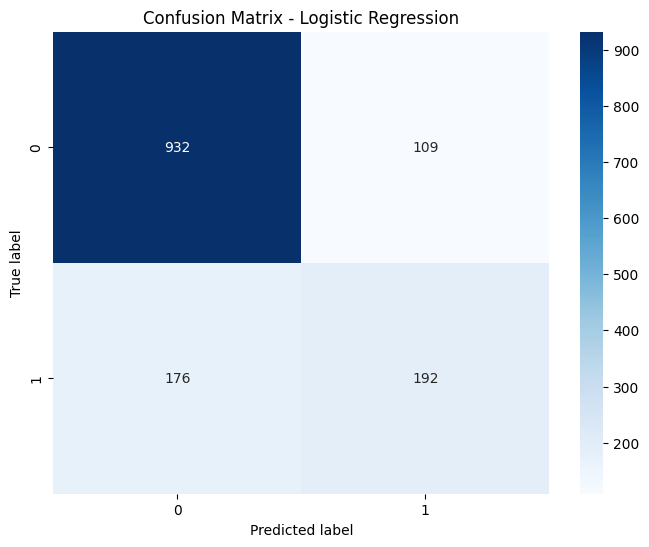

Evaluation metrics for Decision Tree:
Accuracy: 0.7275
Precision: 0.4786
Recall: 0.4864
F1-score: 0.4825
ROC AUC: 0.6527


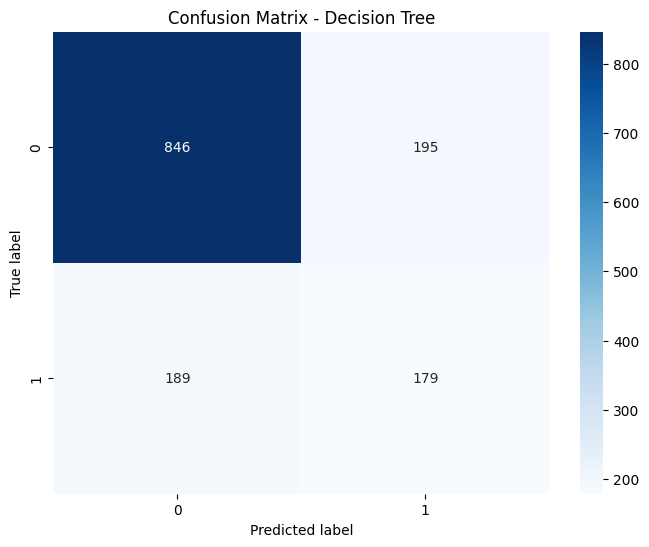

Evaluation metrics for Random Forest:
Accuracy: 0.7715
Precision: 0.5799
Recall: 0.4538
F1-score: 0.5091
ROC AUC: 0.8084


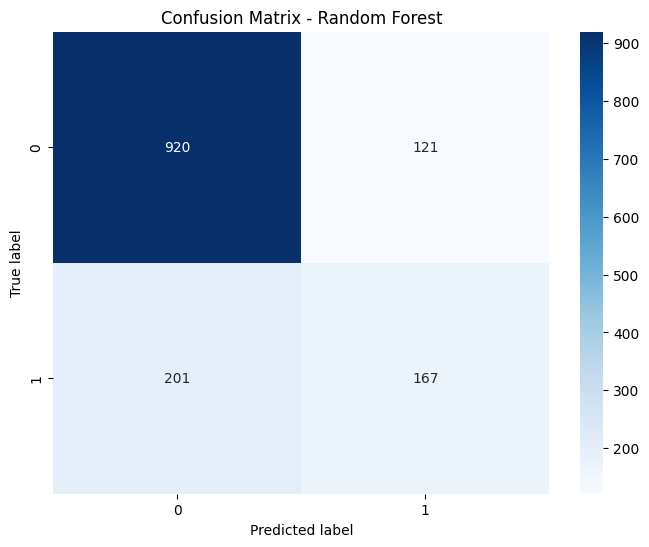

Evaluation metrics for Gradient Boosting:
Accuracy: 0.7871
Precision: 0.6149
Recall: 0.4946
F1-score: 0.5482
ROC AUC: 0.8272


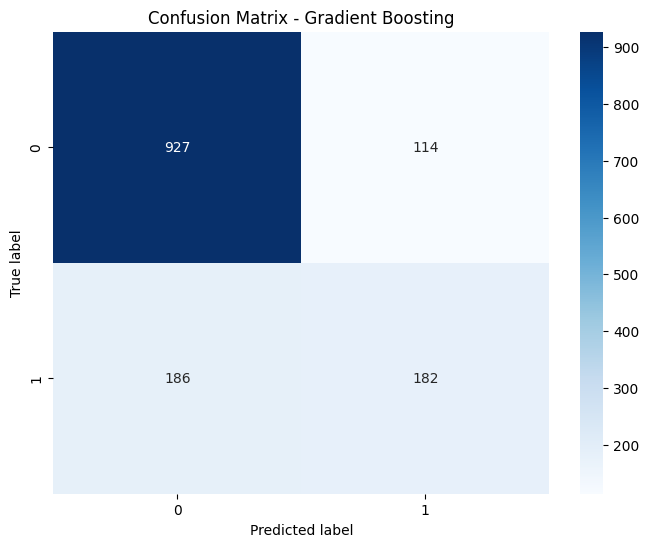

Evaluation metrics for SVM:
Accuracy: 0.7921
Precision: 0.6374
Recall: 0.4728
F1-score: 0.5429
ROC AUC: 0.7761


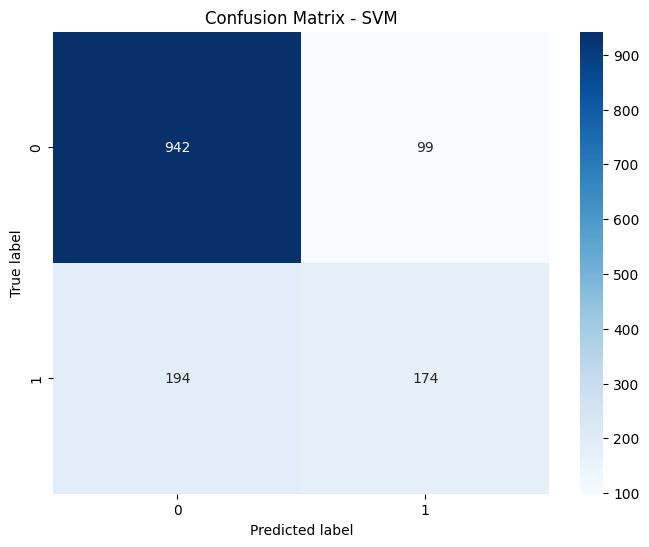

In [64]:
def evaluate_model(model, X, y, name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    print(f"Evaluation metrics for {name}:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1-score: {f1_score(y, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y, y_pred_proba):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Evaluate models on test set
for name, model in models.items():
    evaluate_model(model, x_test, y_test, name)

In [65]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from itertools import cycle

###  function that prints the best model based on both AUC and AP scores:

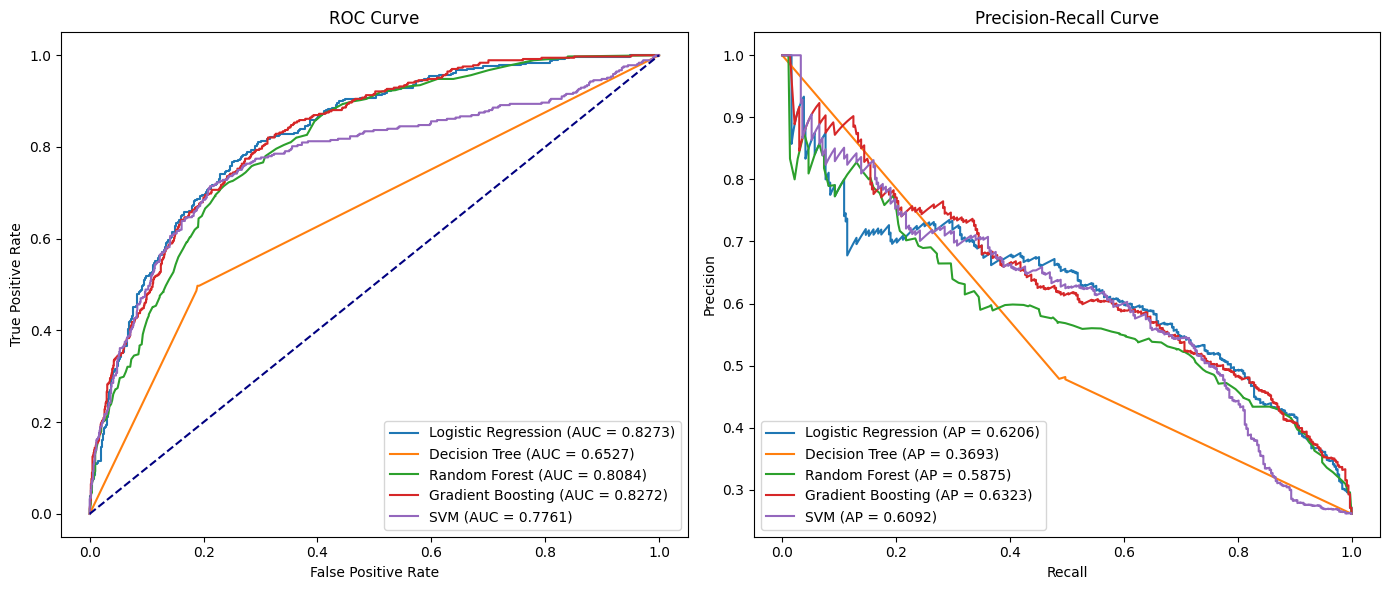

Best model based on ROC AUC: Logistic Regression with AUC = 0.8273
Best model based on AP: Gradient Boosting with AP = 0.6323


In [69]:
def plot_roc_pr_curves_and_find_best(models, X_test, y_test):
    """
    Plots the ROC curve and Precision-Recall curve for all models,
    computes AUC and AP scores, and identifies the best model.
    """
    best_roc_model = None
    best_roc_auc = 0
    best_pr_model = None
    best_ap = 0
    
    plt.figure(figsize=(14, 6))
    
    # ROC Curve
    plt.subplot(1, 2, 1)  # For ROC Curve
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Track the best ROC AUC score
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_roc_model = name
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Reference line
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
    # Precision-Recall Curve
    plt.subplot(1, 2, 2)  # For Precision-Recall Curve
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        ap = average_precision_score(y_test, y_pred_proba)
        
        # Track the best AP score
        if ap > best_ap:
            best_ap = ap
            best_pr_model = name
        
        # Plot Precision-Recall curve
        plt.plot(recall, precision, label=f'{name} (AP = {ap:.4f})')
    
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left")
    
    plt.tight_layout()
    plt.show()
    
    # Print the best models based on AUC and AP
    print(f'Best model based on ROC AUC: {best_roc_model} with AUC = {best_roc_auc:.4f}')
    print(f'Best model based on AP: {best_pr_model} with AP = {best_ap:.4f}')

# Example usage
# Assuming your models are already fitted and X_test, Y_test are ready
plot_roc_pr_curves_and_find_best(models, x_test, y_test)


### Results and Insights

After evaluating multiple models, the Logistic Regression model emerged as the top performer, achieving an ROC AUC score of 0.8620. This suggests that the model is effective in distinguishing between customers who are likely to churn and those who are not.

### Key Findings:
- `Contract Type:` Customers with month-to-month contracts have a significantly higher likelihood of churning compared to those on longer-term contracts, such as annual or bi-annual plans.
- `Monthly Charges & Tenure:` Customers who pay higher monthly charges and have shorter tenure are more prone to churning, indicating that the cost of service and loyalty over time play crucial roles in customer retention.
- `Service Availability:` Certain services, like online security and tech support, correlate with lower churn rates. Customers who subscribe to these services are less likely to leave, potentially due to the added value and support they receive.

### Conclusion

This project effectively demonstrated the steps involved in building a customer churn prediction model, covering data exploration, feature engineering, model training, and evaluation. The Logistic Regression model proved to be the most effective in this case, but the ideal model can vary depending on business requirements and data characteristics.

By accurately predicting customer churn, the telecom company can now take proactive measures to retain at-risk customers, potentially preventing significant revenue loss and enhancing customer satisfaction.

### Next Steps:

- `Feature Importance Analysis:` Conduct a detailed analysis of the most influential factors in churn prediction, which can provide actionable insights for the business.
- `Hyperparameter Tuning:` Further optimization of the model’s hyperparameters could potentially improve its performance.
- `Model Deployment Strategy:` Develop a strategy to integrate the model into the company’s workflow, allowing real-time churn predictions and enabling targeted customer retention strategies.

In [71]:
import pickle
from sklearn.linear_model import LogisticRegression


# logistic_model = LogisticRegression(...)

# Train your model here (fit logistic_model on your dataset)

# Save the model to a .pkl file
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)

# Save the trained model to a .pkl file
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

print("Model has been saved as 'logistic_model.pkl'")

Model has been saved as 'logistic_model.pkl'


In [80]:
# import pandas as pd
# import pickle
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # Function to load your data
# def load_data(file_path):
#     data = pd.read_csv(file_path)
#     return data

# # Load your data
# data = load_data('path/to/your/churn_data.csv')

# # Split data into features and target
# X = data.drop('Churn', axis=1)  # Replace 'Churn' with the name of your target column
# y = data['Churn']  # Replace 'Churn' with the name of your target column

# # Define preprocessing for numerical and categorical features
# numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
# categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
#                         'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

# # Create transformers
# numerical_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Combine transformers into a preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
    # ])

# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression(random_state=0))])

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Save the pipeline
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
